## 1.0 Pre-process the dataset and EDA

In [1]:
# Importing Libraries to handle data manipulation and visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing dataset and selection

In [2]:
#Importing the dataset
filepath = "C:/Users/Admin/Documents/work/newwork/New folder/benchmark_report_excel_data_2019-2023_v2 (5).xlsx"
excel_file = pd.ExcelFile(filepath)
# Print sheet names
print(excel_file.sheet_names)



['Notes', 'Organisation Benchmark groups', 'Acute&Acute Community Trusts', 'Acute Specialist Trusts', 'MH&LD, MH, LD&Community Trusts', 'Community Trusts', 'Ambulance Trusts', 'ICBs', 'CSUs', 'Social Enterprises MH', 'Social Enterprises Community', 'Community Surgical Services']


The dataset, sourced from the National Patient Survey (NPS), provides valuable insights into the perceptions and feelings of healthcare professionals. The downloaded version categorise this details based on organization bench mark group to each of the excel sheet. After downloading the data we create a dataframe to combine all the information into one. 

In [3]:
# Initialize an empty list to store all DataFrames
all_dfs = []


# Loop through the sheets
for sheet_name in excel_file.sheet_names[2:]:
    # Read the specific sheet into a DataFrame
    all_df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    # Add the DataFrame to the list
    all_dfs.append(all_df)
    
# Concatenate all DataFrames vertically (row-wise)
ALL_df_c = pd.concat(all_dfs, ignore_index=True)

#print(ALL_df_c.columns.tolist())


## DATA Selection

This study wishes to classify organisation based on their scores in the PPE, theme morale and engagment, stress and job satisfaction. In considereing this, the data were extracted seperatly in order to understand patterns and trends in the data among the organisation bench mark.

In [4]:
# List of PP columns to plot
pp_columns = ['PP1_2023', 'PP2_2023','PP3_2023',  'PP4_2023', 'PP5_2023', 'PP6_2023', 'PP7_2023']


# Define a function to filter and print columns based on a keyword
def filter_and_print_columns(df, keyword):
    filtered_columns = [col for col in df.columns if keyword in col.lower()]
    print(f"\nColumns containing '{keyword}':")
    print(filtered_columns)
    return filtered_columns

# Apply the function to different keywords
columns_morale = filter_and_print_columns(ALL_df_c, 'theme_morale_202')
columns_engagement = filter_and_print_columns(ALL_df_c, 'theme_engagement_202')
columns_Q12a = filter_and_print_columns(ALL_df_c, 'q12a_202')
columns_Q12b = filter_and_print_columns(ALL_df_c, 'q12b_202')
columns_Q12c = filter_and_print_columns(ALL_df_c, 'q12c_202')
columns_Q12d = filter_and_print_columns(ALL_df_c, 'q12d_202')
columns_Q12e = filter_and_print_columns(ALL_df_c, 'q12e_202')
columns_Q12f = filter_and_print_columns(ALL_df_c, 'q12f_202')
columns_Q12g = filter_and_print_columns(ALL_df_c, 'q12g_202')
columns_Q4a = filter_and_print_columns(ALL_df_c, 'q4a_202')
columns_Q4b = filter_and_print_columns(ALL_df_c, 'q4b_202')
columns_Q4c = filter_and_print_columns(ALL_df_c, 'q4c_202')
columns_Q4d = filter_and_print_columns(ALL_df_c, 'q4d_202')

theme_M_E = columns_morale + columns_engagement
stress = columns_Q12a+columns_Q12b+columns_Q12c+columns_Q12d+columns_Q12e+columns_Q12f+columns_Q12g
job_S = columns_Q4a  + columns_Q4b + columns_Q4c + columns_Q4d

V_data = pp_columns + theme_M_E + stress + job_S

## dataframe
ppe_data = ALL_df_c[pp_columns]
Data_theme_M_E =  ALL_df_c[theme_M_E]
Data_stress = ALL_df_c[stress]
Data_job_S = ALL_df_c[job_S]

V_data_df = ALL_df_c[V_data]


Columns containing 'theme_morale_202':
['theme_morale_2023', 'theme_morale_2022', 'theme_morale_2021', 'theme_morale_2020']

Columns containing 'theme_engagement_202':
['theme_engagement_2023', 'theme_engagement_2022', 'theme_engagement_2021', 'theme_engagement_2020']

Columns containing 'q12a_202':
['q12a_2023', 'q12a_2022', 'q12a_2021']

Columns containing 'q12b_202':
['q12b_2023', 'q12b_2022', 'q12b_2021']

Columns containing 'q12c_202':
['q12c_2023', 'q12c_2022', 'q12c_2021']

Columns containing 'q12d_202':
['q12d_2023', 'q12d_2022', 'q12d_2021']

Columns containing 'q12e_202':
['q12e_2023', 'q12e_2022', 'q12e_2021']

Columns containing 'q12f_202':
['q12f_2023', 'q12f_2022', 'q12f_2021']

Columns containing 'q12g_202':
['q12g_2023', 'q12g_2022', 'q12g_2021']

Columns containing 'q4a_202':
['q4a_2023', 'q4a_2022', 'q4a_2021', 'q4a_2020']

Columns containing 'q4b_202':
['q4b_2023', 'q4b_2022', 'q4b_2021', 'q4b_2020']

Columns containing 'q4c_202':
['q4c_2023', 'q4c_2022', 'q4c_2021'

# Data Pre-processing and cleaning

This stage involves getting infomation about the dataset as well as checking for missing values and other data quality features.

In [14]:
def infor(dataset): 
    # Display basic information about the dataset
    print(dataset.info())
    return dataset.info()
    # Checking for missing values
    print(dataset.isnull().sum())
    return dataset.isnull().sum()
    #ALL_df_c = dataset.dropna()
    

infor(V_data_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PP1_2023               268 non-null    float64
 1   PP2_2023               268 non-null    float64
 2   PP3_2023               268 non-null    float64
 3   PP4_2023               268 non-null    float64
 4   PP5_2023               268 non-null    float64
 5   PP6_2023               268 non-null    float64
 6   PP7_2023               268 non-null    float64
 7   theme_morale_2023      268 non-null    float64
 8   theme_morale_2022      258 non-null    float64
 9   theme_morale_2021      242 non-null    float64
 10  theme_morale_2020      226 non-null    float64
 11  theme_engagement_2023  268 non-null    float64
 12  theme_engagement_2022  258 non-null    float64
 13  theme_engagement_2021  242 non-null    float64
 14  theme_engagement_2020  226 non-null    float64
 15  q12a_2

The NHS dataset contains 268 entry and 2059 variables. Each of the variables represent the questions asked during the survey. For the purpose of this research, we will only considered varibles related to people purpose elements, staff satiasfaction and stress.

Missing values was observed in the data of the pervious years , year 2022 and 2021. There could be alot of reasons for this such as, the scope of the survey, the organisation might not have been established or meeting certain requirements, etc. This inadequate information made us to drop organisation with no information for those years instead of replacing the values with mean or other statistical features. This also raise the biasedness that may arose when comparing the score of each organisation benchmark for the PPE across years.
Therefore, we will only focus on 2023 dataset for the whole analysis

Understanding staff experience in relation to the score vlaues of the people promise elements for year 2023. this includes 7 elements. 
1. We are compassionate and inclusive 
2. We are recognised and rewarded 
3. We each have a voice that counts 
4. We are safe and healthy 
5. We are always learning 
6. We work flexibly 
7. We are a team.


In understanding the staff stress expreences we will consider question 12 that involves the below:
Q12a: % of staff selecting Often or Always for q12a - How often, if at all, do you find your work emotionally exhausting? for year 20XX
Q12b : % of staff selecting Often or Always for q12b - How often, if at all, do you feel burnt out because of your work? for year 20XX
Q12c: % of staff selecting Often or Always for q12c - How often, if at all, does your work frustrate you? for year 20XX
Q12d: % of staff selecting Often or Always for q12d - How often, if at all, are you exhausted at the thought of another day/shift at work? for year 20XX
Q12e: % of staff selecting Often or Always for q12e - How often, if at all, do you feel worn out at the end of your working day/shift? for year 20XX
Q12f: % of staff selecting Often or Always for q12f - How often, if at all, do you feel that every working hour is tiring for you? for year 20XX
Q12h: % of staff selecting Often or Always for q12g - How often, if at all, do you not have enough energy for family and friends during leisure time? for year 20XX



## Explorary Data Analysis and Visuliazation

In [22]:
# Group by the 'org_type_reporting_name' column and count the number of 'org_name'
summary_table = ALL_df_c.groupby('org_type_reporting_name')['org_name'].count().reset_index()

# Rename the columns for better readability
summary_table.columns = ['Organization Type', 'Count of org_name']

# If you want to add the 'Grand Total' row like in Excel:
total_row = pd.DataFrame([['Grand Total', summary_table['Count of org_name'].sum()]], columns=['Organization Type', 'Count of org_name'])
summary_table = pd.concat([summary_table, total_row], ignore_index=True)

print(summary_table)

SyntaxError: invalid syntax (3612080551.py, line 5)

In [24]:
# Create a pivot table to count the occurrences of org_name based on org_mode and org_type_reporting_name
pivot_table = pd.pivot_table(ALL_df_c, 
                             values='org_name',  # The column we want to count
                             index='org_type_reporting_name',  # Rows: organization type names
                             columns='org_mode',  # Columns: org_mode (Mixed, Online, Paper)
                             aggfunc='count',  # Aggregate function is count
                             fill_value=0,  # Fill missing values with 0
                             margins=True,  # Adds a grand total at the bottom and right
                             margins_name='Grand Total')  # Name for the grand total

# Display the result
print(pivot_table)

org_mode                        Mixed  Online  Paper  Grand Total
org_type_reporting_name                                          
Acute Specialist Trusts            11       2      0           13
Acute&Acute Community Trusts      103      16      3          122
Ambulance Trusts                    4       7      0           11
CSUs                                0       4      0            4
Community Trusts                   13      12      0           25
ICBs                                5      36      0           41
MH&LD, MH, LD&Community Trusts     44       7      1           52
Grand Total                       180      84      4          268


the bar charts shows the average score of the selected varibales over 3 years across the organisation benchmark base on the mode of the organisation. 

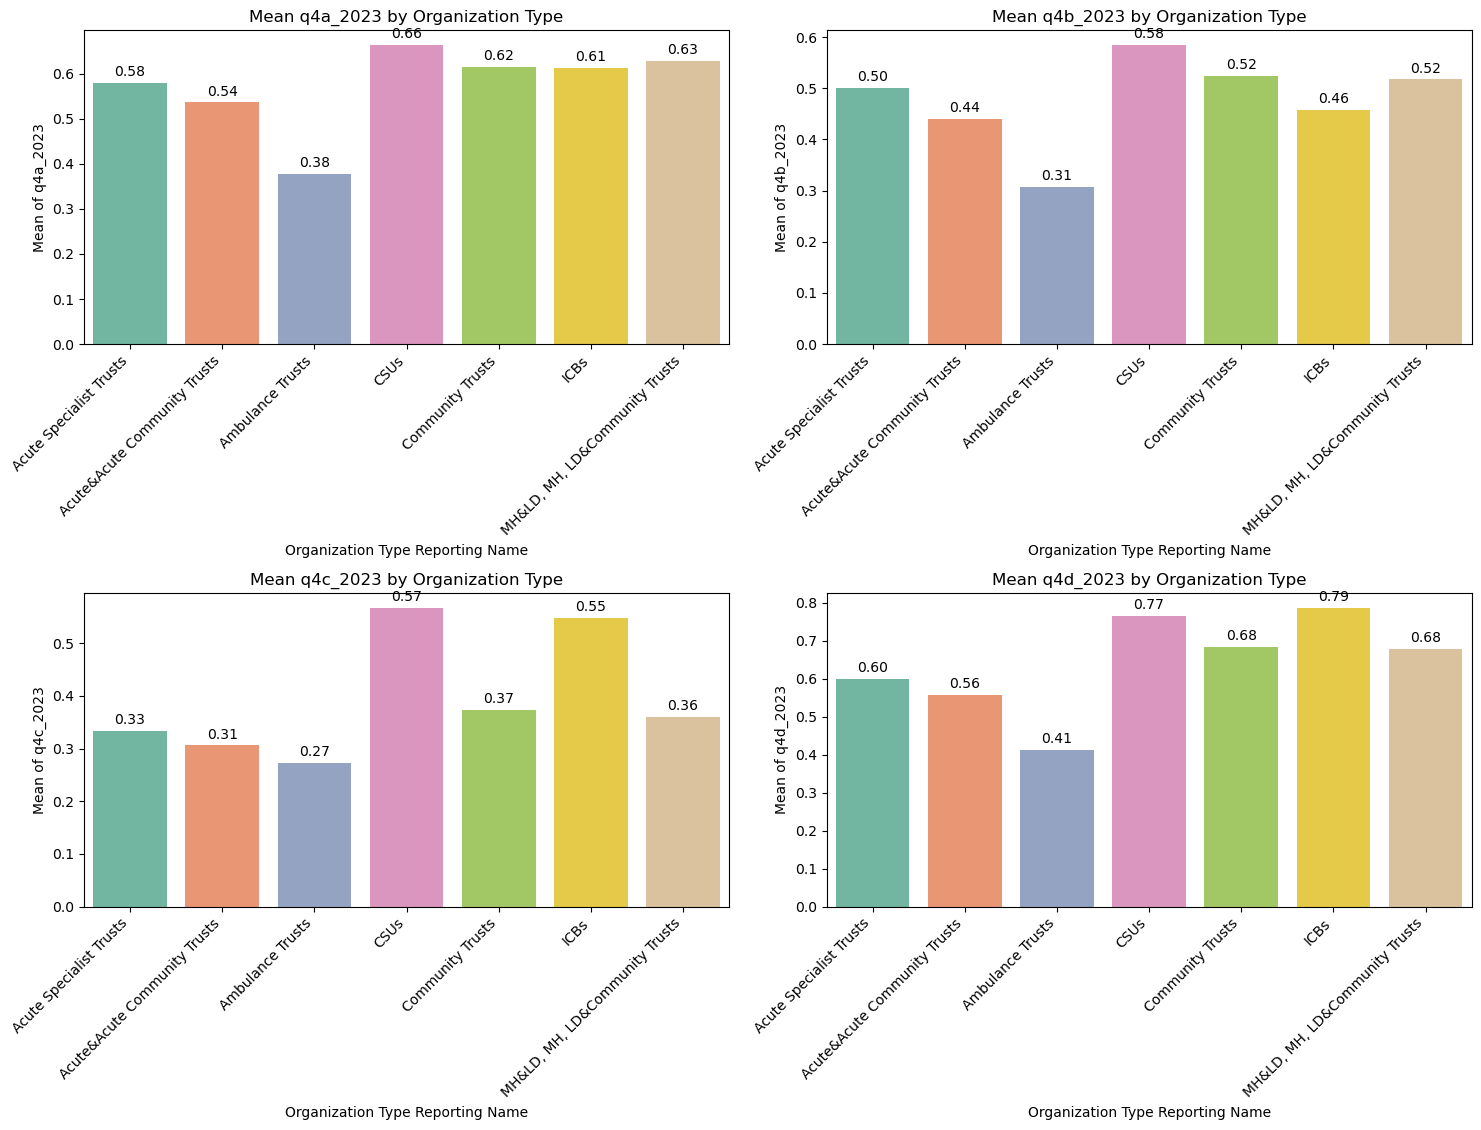

In [79]:
def bar_plot(dataset, filename = "")
# Determine the number of rows and columns for the panel
n_cols = 2  # Number of columns in the panel
n_rows = (len(dataset) + n_cols - 1) // n_cols  # Calculate the number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*6))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Store the handles and labels for the legend
handles, labels = None, None

# Loop through each PP column and create the corresponding subplot
for i, pp_column in enumerate(dataset):
    # Group the data by org_type_reporting_name and org_mode, then calculate the mean for the current PP column
    df_grouped = ALL_df_c.groupby(['org_type_reporting_name'])[pp_column].mean().reset_index()
    
    # Create the bar plot on the corresponding axis
    bar_plot = sns.barplot(
        x='org_type_reporting_name', 
        y=pp_column,  
        data=df_grouped, 
        palette='Set2',
        ax=axes[i]  # Plot on the ith subplot
    )
    
    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    
    # Add labels and title
    axes[i].set_xlabel('Organization Type Reporting Name')
    axes[i].set_ylabel(f'Mean of {pp_column}')
    axes[i].set_title(f'Mean {pp_column} by Organization Type')

    # Add the values on top of the bars
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.2f}',  # Format to 2 decimal places
                         (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the center of the bar
                         ha='center', va='baseline', 
                         fontsize=10, color='black', xytext=(0, 5), 
                         textcoords='offset points')

    # Store handles and labels from the first plot for the legend
    if handles is None and labels is None:
        handles, labels = axes[i].get_legend_handles_labels()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to make sure everything fits
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.savefig(f'{filename}_barplot_with_single_legend1.png')
plt.show()

# List of PP columns to plot
pp_columns = ['PP1_2023', 'PP2_2023','PP3_2023',  'PP4_2023', 'PP5_2023', 'PP6_2023', 'PP7_2023']
q12 = ['q12a_2023', 'q12b_2023', 'q12c_2023', 'q12d_2023','q12e_2023', 'q12f_2023','q12g_2023']
q4 = ['q4a_2023', 'q4b_2023', 'q4c_2023', 'q4d_2023']
MT = ['theme_engagement_2023', 'theme_morale_2023']

bar_plot(pp_columns, filename = "pp_columns")
bar_plot(q12, filename = "q12")
bar_plot(q4, filename = "q4")
bar_plot(MT, filename = "MT")

# Correlation Analysis

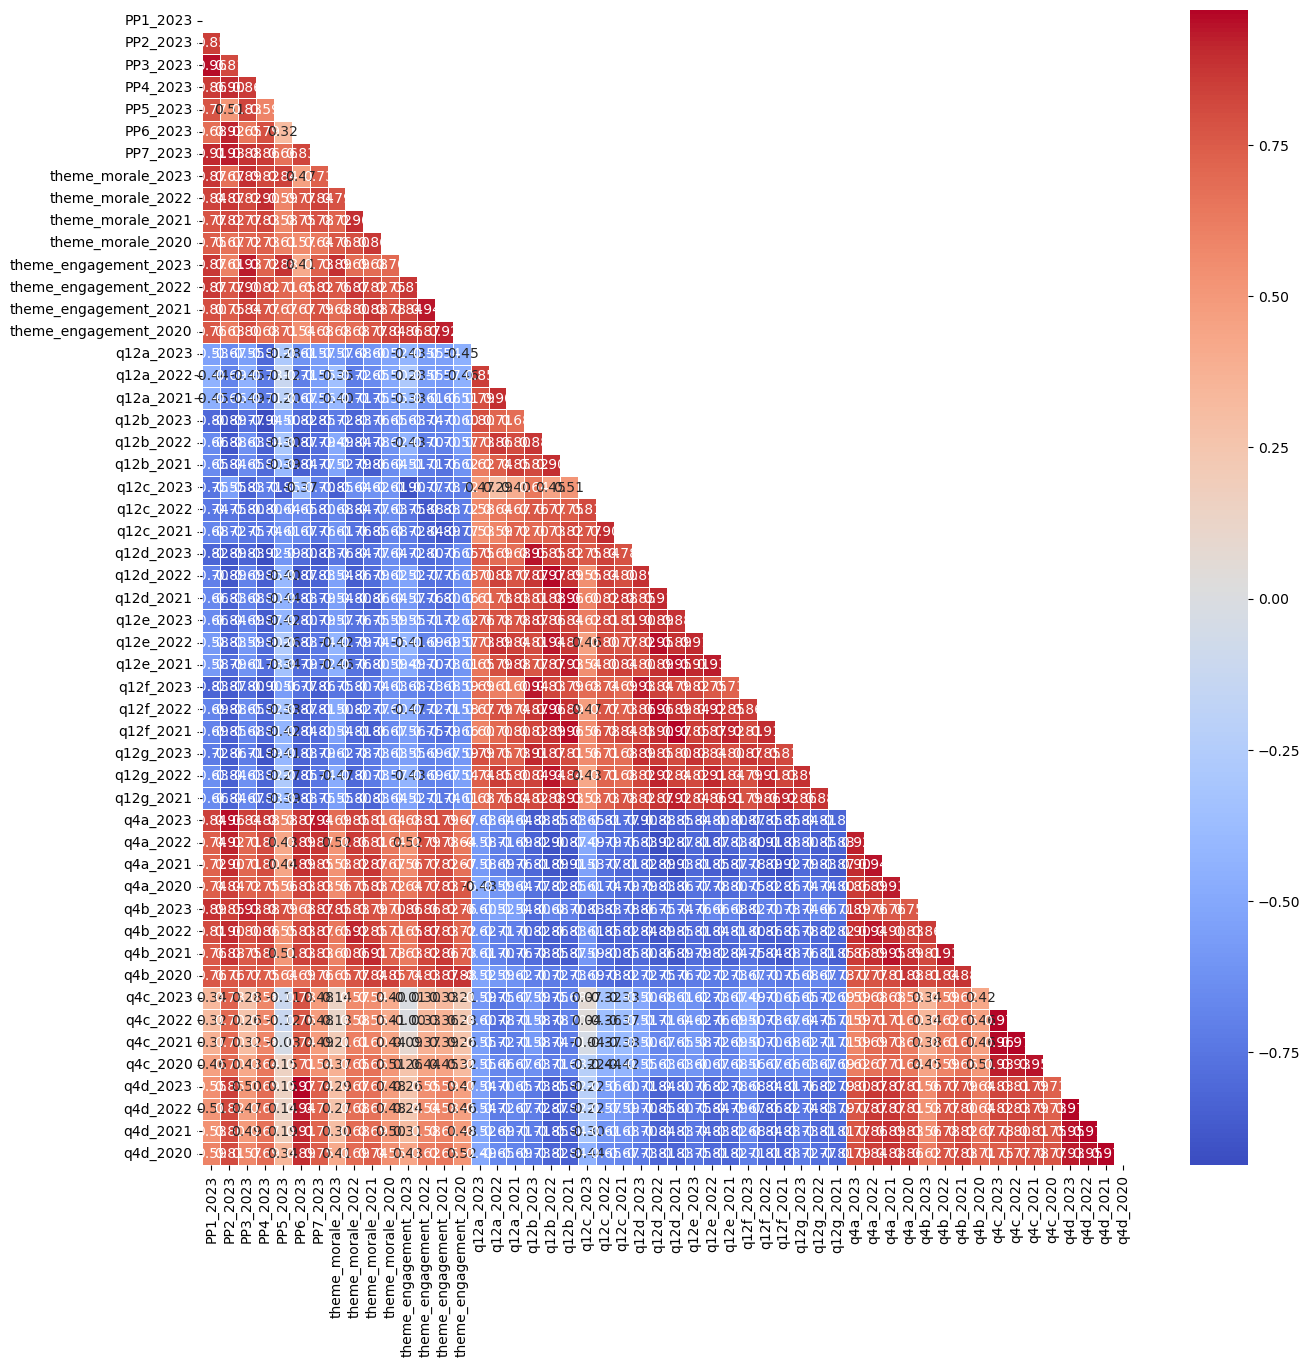

In [53]:
# Compute the correlation matrix
correlation_matrix = V_data_df.corr()

# Plot the heatmap
plt.figure(figsize=(15,15))
mask = np.triu(np.ones_like( V_data_df.corr()))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5 , mask=mask)
#plt.title('Correlation Matrix of Iris Dataset')
plt.show()

In [54]:
## Cluster Analysis

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


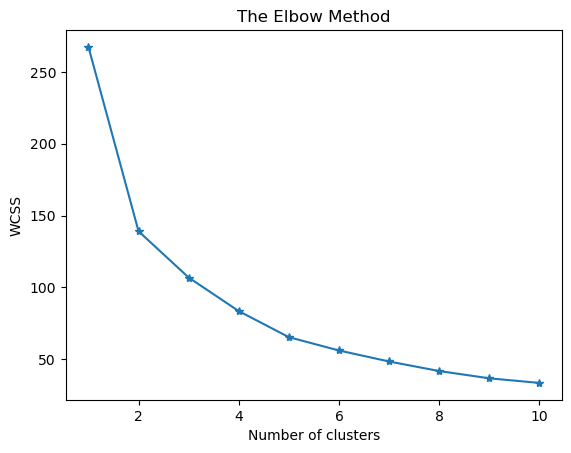

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


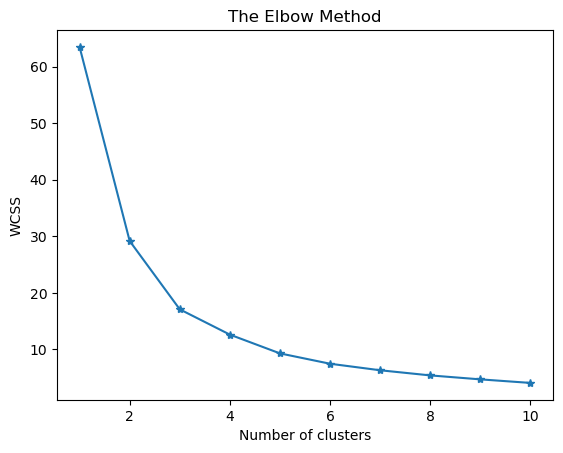

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


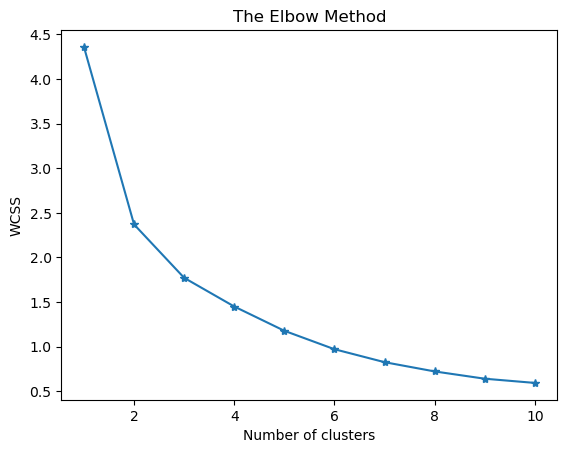

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


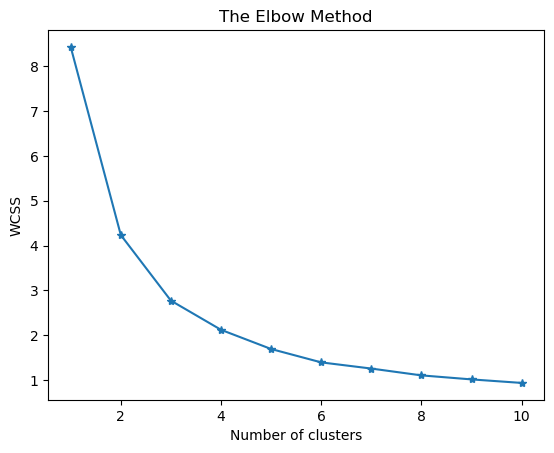

In [5]:
from sklearn.cluster import KMeans

def plot_elbow_method(data, max_clusters=10, filename="elbow_plot"):
    """
    Plots the Elbow Method graph for a given dataset to determine the optimal number of clusters.

    Parameters:
    - data: DataFrame or 2D array containing the data to cluster.
    
    """
    
    # WCSS (Within-Cluster Sum of Squares)
    wcss = []
    n_samples = data.shape[0]  # Number of samples in the dataset

    for i in range(1, min(11, n_samples + 1)):  # Ensure max clusters <= number of samples
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    # Plotting the Elbow Method
    plt.plot(range(1, len(wcss) + 1), wcss, marker="*")
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    # Save the plot as a PNG file
    plt.savefig(f'{filename}.png')  # Use the filename parameter
    plt.show()
    


# Example usage of the function:
plot_elbow_method(ppe_data, max_clusters=10, filename="ppe_data_elbow")
plot_elbow_method(Data_theme_M_E.iloc[: ,[0,4]], max_clusters=10, filename="Data_theme_M_E_elbow")
plot_elbow_method(Data_stress.iloc[: ,[0,3,6,9,12,15,18]], max_clusters=10, filename="Data_stress_elbow")
plot_elbow_method(Data_job_S.iloc[: ,[0,4,8,12]], max_clusters=10, filename="Data_job_S_elbow")

In order to know the number of groups that exist in a dataset, we adopt the elbow graph method to optimise the number of clusters in the each of the extracted dataset. to identify the number of clusters we trace the elbow joint to the x-axis. For this study, we discovered 2 clusters for the dataset on PPE, 3 for the data that contains staff morale and engagement, for data on stress, we had 2 clusters and 3 clusters for dataset on job satisfaction.

In [56]:
print("Number of columns in Data_stress:", Data_stress.shape[1])

Number of columns in Data_stress: 21


In [6]:
def perform_kmeans(data, n_clusters, init='k-means++', random_state=42):
    """
    Applies KMeans clustering on the provided data and returns the cluster labels.

    Parameters:
    - data: DataFrame or 2D array containing the data to cluster.
    - n_clusters: The number of clusters to form (default is 2).
    - init: Method for initialization (default is 'k-means++').
    - random_state: Seed used by the random number generator (default is 42).

    Returns:
    - y_kmeans: Array of cluster labels for each data point.
    """
    kmeans = KMeans(n_clusters=n_clusters, init=init, random_state=random_state)
    y_kmeans = kmeans.fit_predict(data)
    print("Y_kmeans:", y_kmeans)
    #return y_kmeans

perform_kmeans(ppe_data, 2)
perform_kmeans(Data_theme_M_E.iloc[: ,[0,4]], 3)
perform_kmeans(Data_stress.iloc[: ,[0,3,6,9,12,15,18]], 2)
perform_kmeans(Data_job_S.iloc[: ,[0,4,8,12]], 3)

Y_kmeans: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1
 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
Y_kmeans: [1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 1 2 1 1 0 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 2 2 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 2 0 1 2 0 1 1 1 1 1 1 1 1 2 1 1 2 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 2
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2

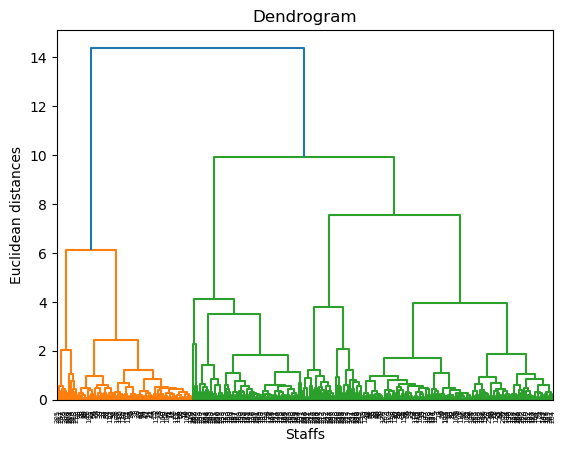

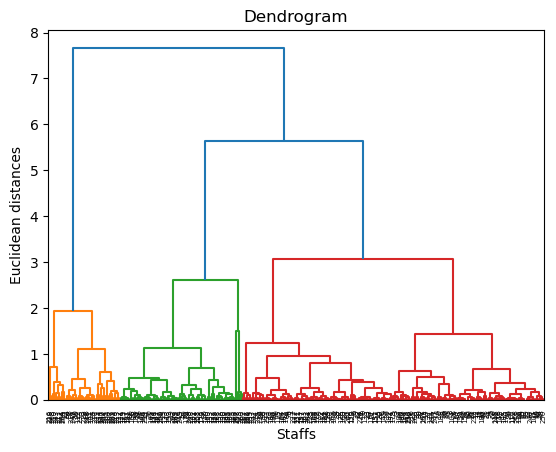

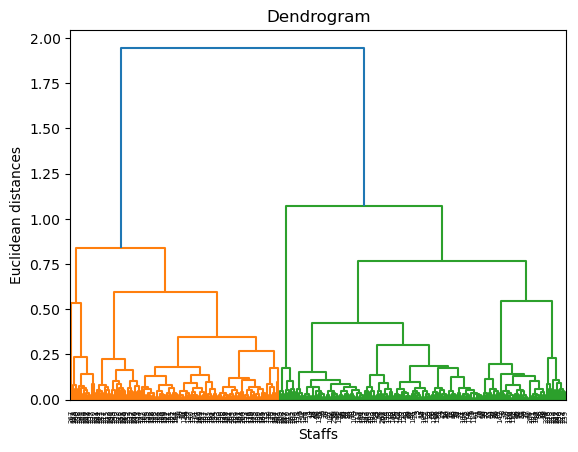

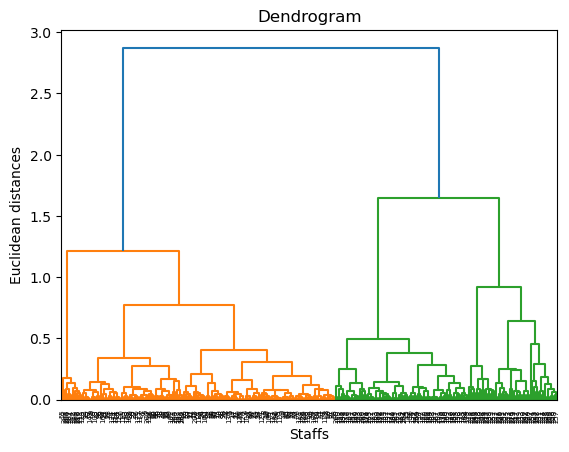

In [20]:
import scipy.cluster.hierarchy as sch

def plot_dendrogram(data, filename="Dend_plot"):
    """
    Plots a dendrogram for the provided data using hierarchical clustering.

    Parameters:
    - data: DataFrame containing the data to cluster.
    """
    # Compute the linkage matrix
    linkage_matrix = sch.linkage(data, method='ward')

    # Plot the dendrogram
    dendrogram = sch.dendrogram(linkage_matrix)
    
    plt.title('Dendrogram')
    plt.xlabel('Staffs')
    plt.ylabel('Euclidean distances')
# Save the plot as a PNG file
    plt.savefig(f'{filename}.png')  # Use the filename parameter
    plt.show()
    


# Example usage of the function:
plot_dendrogram(ppe_data, filename="ppe_data_dendo")
plot_dendrogram(Data_theme_M_E.iloc[: ,[0,4]], filename="Data_theme_M_E_dendo")
plot_dendrogram(Data_stress.iloc[: ,[0,3,6,9,12,15,18]], filename="Data_stress_dendo")
plot_dendrogram(Data_job_S.iloc[: ,[0,4,8,12]], filename="Data_job_S_dendo")

The dendrogram depicted above, shows insight into the hierarchical structure of clusters and the sequential merging of data points during the clustering process. By segmenting the dendrogram along the longest vertical line and considering the distinctiveness of colors, we infer that the dataset can be grouped into two clusters, which is similar to the result from the screen plot using in determining the cluster for the Kmeans.
Moreso, due to the size of our data and for the consistency in results, the dendogram approach to clustering will be considered to the Kmeans for this research.

# Principal Component Analysis (PCA) for dimensional reduction

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

PC1: 78.37%
PC2: 16.69%
PC3: 2.24%
PC4: 1.18%
PC5: 0.77%
PC6: 0.41%
PC7: 0.35%


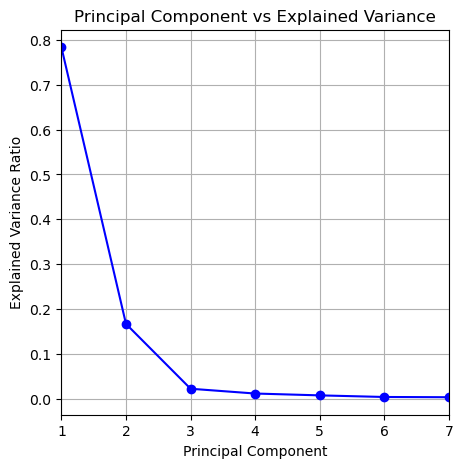

PC1: 94.41%
PC2: 5.59%


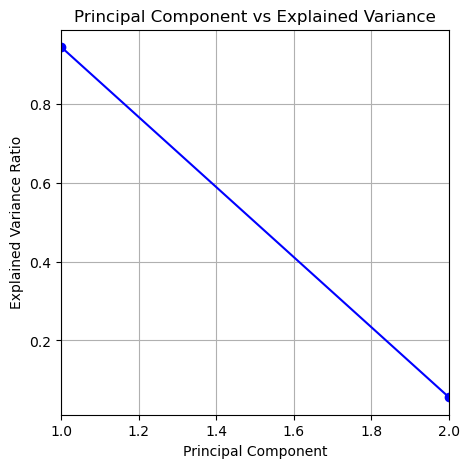

PC1: 80.27%
PC2: 11.13%
PC3: 3.77%
PC4: 2.99%
PC5: 0.89%
PC6: 0.52%
PC7: 0.43%


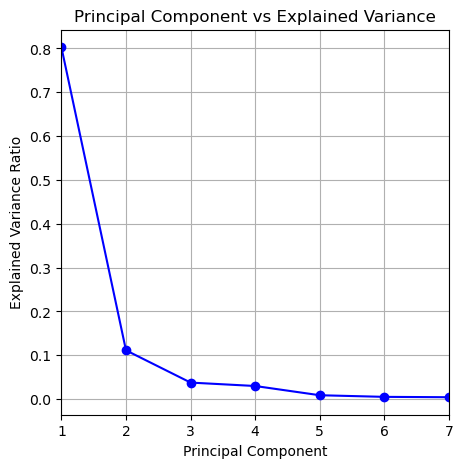

PC1: 77.43%
PC2: 17.39%
PC3: 4.31%
PC4: 0.87%


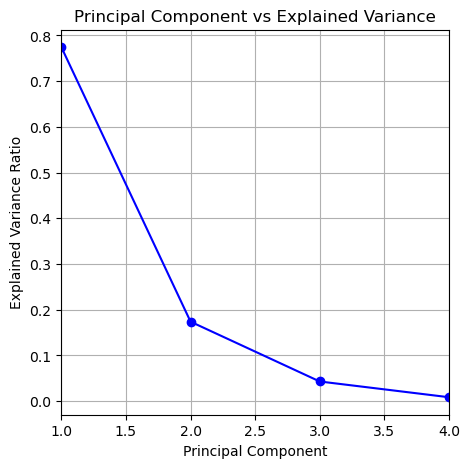

In [60]:
def PCA_graph(data, filename='pca'):
    # Initialize PCA
    pca = PCA()
    
    # Fit and transform the data
    data_transformed = pca.fit_transform(data)

    # Print the explained variance ratio for each principal component
    for i, ratio in enumerate(pca.explained_variance_ratio_):
        print(f"PC{i+1}: {round(ratio * 100, 2)}%")
    
    # Plot the explained variance ratio
    plt.figure(figsize=(5, 5))
    plt.plot(range(1, data.shape[1] + 1), pca.explained_variance_ratio_, marker='o', linestyle='-', color='b')
    plt.grid()
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Principal Component vs Explained Variance')
    plt.xlim(1, data.shape[1])
     # Save the plot as a PNG file
    plt.savefig(f'{filename}.png')  # Use the filename parameter
    plt.show()

# usage
PCA_graph(ppe_data, filename='pca_ppe')
PCA_graph(Data_theme_M_E.iloc[:, [0, 4]], filename='pca_ME')
PCA_graph(Data_stress.iloc[:, [0, 3, 6, 9, 12, 15, 18]], filename='pca_stress')
PCA_graph(Data_job_S.iloc[:, [0, 4, 8, 12]], filename='pca_js')

## Predictive Model for unsupervised learning using PCA and logistic regression

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[[44  0]
 [ 0 10]]
1.0


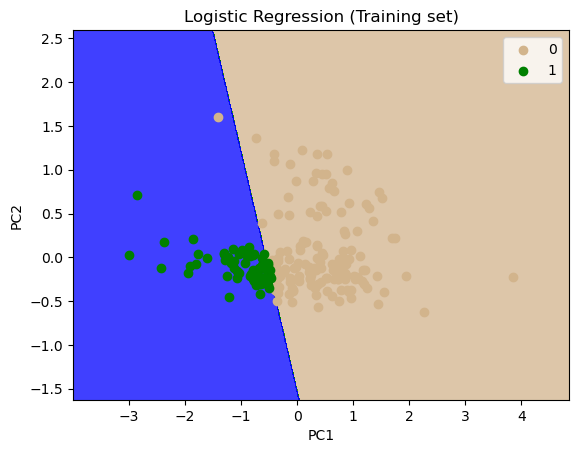

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


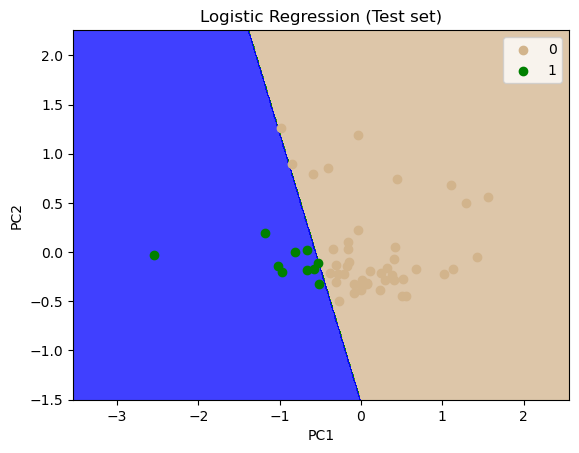

[[32  0  0]
 [ 1  7  0]
 [ 2  0 12]]
0.9444444444444444


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


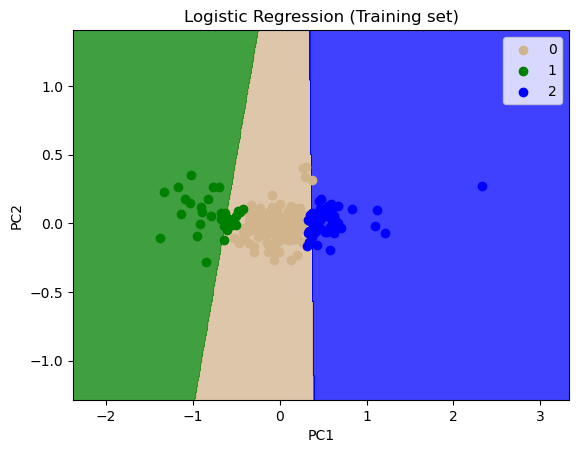

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


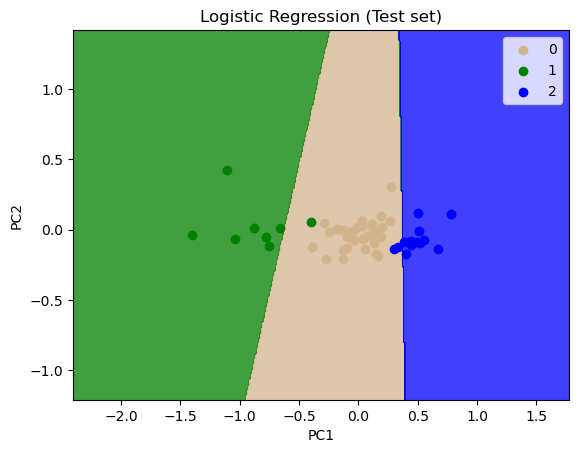

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[[34  0]
 [ 1 19]]
0.9814814814814815


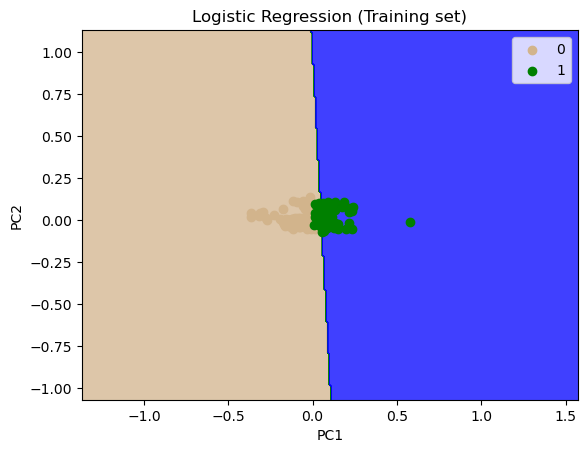

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


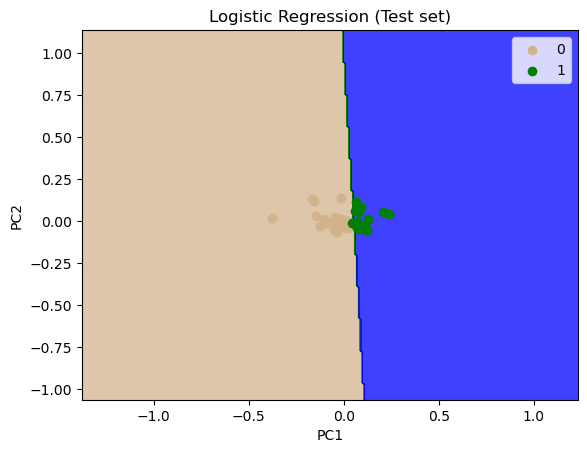

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[[16  5]
 [ 0 33]]
0.9074074074074074


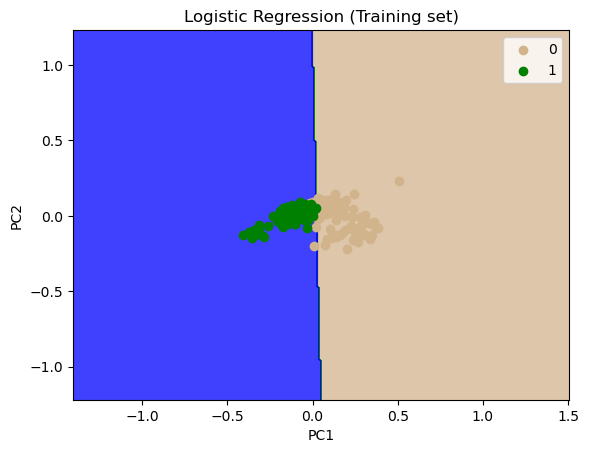

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


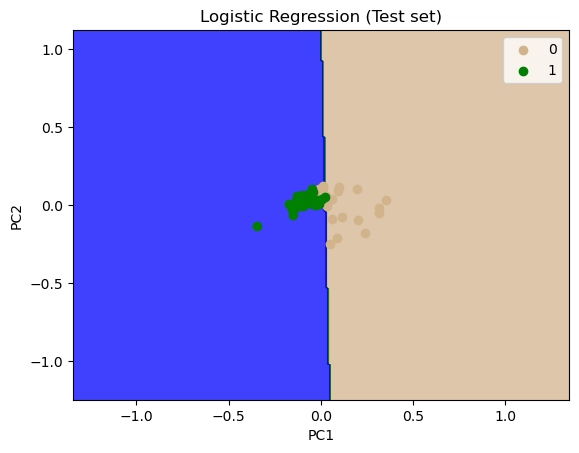

In [9]:
from sklearn.cluster import AgglomerativeClustering

def hc_pca_pred(data, n_clusters, affinity='euclidean', linkage='ward', filename1 = "train", filename2 = "test"):
   # Perform hierarchical clustering
    hc = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
    y_hc = hc.fit_predict(data)
    
    # Add the cluster labels as a new column in the data
    data_with_clusters = pd.concat([data, pd.Series(y_hc, index=data.index, name='Cluster')], axis=1)
    
    X = data_with_clusters.iloc[:, :-1]
    y = data_with_clusters.iloc[:, -1]
    # data splitting into test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    
    pca = PCA(n_components = 2)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    classifier = LogisticRegression(random_state = 0)
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    acs = accuracy_score(y_test, y_pred)
    print(acs)
    
   
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('tan', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('tan', 'green', 'blue'))(i), label = j)
    plt.title('Logistic Regression (Training set)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.savefig(f'{filename1}.png')  
    plt.show()
        
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('tan', 'green', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('tan', 'green', 'blue'))(i), label = j)
    plt.title('Logistic Regression (Test set)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.savefig(f'{filename2}.png')  
    plt.show()


    
# usage
hc_pca_pred(ppe_data, 2, filename1 = "ppe_train", filename2 = "ppe_test")
hc_pca_pred(Data_theme_M_E.iloc[:, [0, 4]], 3, filename1 = "me_train", filename2 = "me_test" )
hc_pca_pred(Data_stress.iloc[:, [0, 3, 6, 9, 12, 15, 18]], 2, filename1 = "q12_train", filename2 = "q12_test")
hc_pca_pred(Data_job_S.iloc[:, [0, 4, 8, 12]], 2, filename1 = "q4_train", filename2 = "q4_test")